## LIBRAIRIES

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,recall_score,accuracy_score,roc_auc_score
from sklearn.metrics import precision_score,precision_recall_curve,f1_score,classification_report,roc_curve,RocCurveDisplay

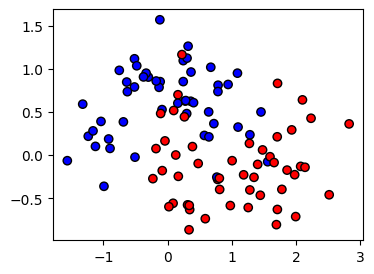

In [90]:

X, y = make_moons(n_samples=100, noise=0.3, random_state=42)
plt.figure(figsize=(4, 3))
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap="bwr")
plt.show()

In [91]:
knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=3)

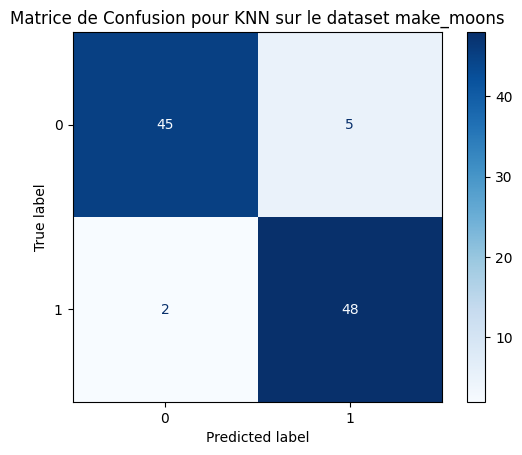

In [92]:
# Prédire les étiquettes pour le dataset
y_pred = knn.predict(X)

# Calculer la matrice de confusion
cm = confusion_matrix(y, y_pred)

# Afficher la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de Confusion pour KNN sur le dataset make_moons")
plt.show()

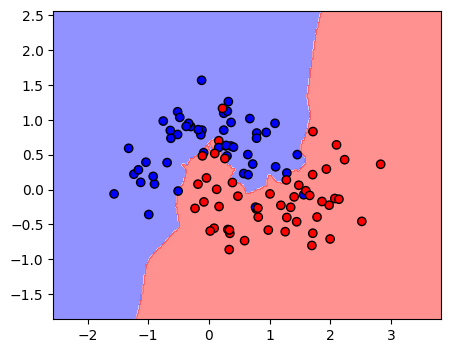

In [93]:
h = .02 # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(5, 4))
plt.contourf(xx, yy, Z, alpha=0.5, cmap="bwr")
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap="bwr")
plt.show()

### **ACCURACY (excatitude) : l'ensemble des positifs détectés (ceux qui sont reellement vrai et ceux qui sont reellement faux ) par rapport a l'ensemble de nos données**

In [94]:
accuracy_score(y,y_pred)

0.93

### **PRECISION : mesure la proportion de reellement vraie parmi les element detecé comme vrai** 

In [95]:
precision_score(y,y_pred)

0.9056603773584906

### **RECALL : mesure la proportion de reellement vraie trouvé parmi les "reellement vrai"**

In [96]:
recall_score(y,y_pred)

0.96

### **COURBE DE PRECISION RECALL : elle est fonction du modele et nous permet de fixer la precison souhaité ou le recall"**

In [97]:
## il faut d'abord la probabilité de predire chaque partie de notre classification 
proba_pred = knn.predict_proba(X)[:, 1]
pd.DataFrame(proba_pred).head(10)

,0
0,1.000000
1,0.333333
2,0.666667
3,0.000000
4,0.666667
5,0.000000
6,0.333333
7,1.000000
8,0.000000
9,0.666667


In [98]:
precision , recall,thresholds = precision_recall_curve(y,proba_pred)
#precision 
#recall(sensiivity aka sensibilité)
#thresholds (seuil)


C:\Users\franc\AppData\Local\Temp\ipykernel_20636\1505333888.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="best")


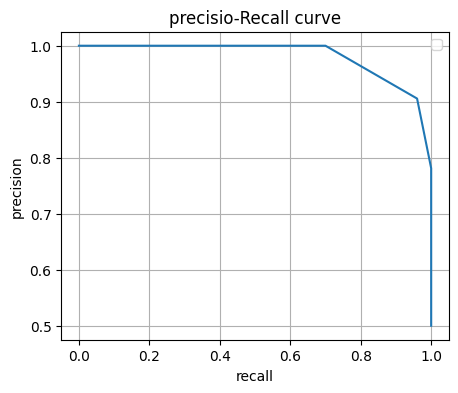

In [99]:
plt.figure(figsize=(5,4))
plt.plot(recall,precision)
plt.xlabel("recall")
plt.ylabel("precision")
plt.title('precisio-Recall curve')
plt.legend(loc="best")
plt.grid()
plt.show()

## **SCORE F1:**

In [100]:
f1_score(y,y_pred)

0.9320388349514563

## **RESUME DES METRIQUES DE CLASSIFICATION**

In [101]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93        50
           1       0.91      0.96      0.93        50

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



### **ROC CURVE**

In [102]:
y_score= knn.predict_proba(X)
pd.DataFrame(y_score[:,1])

,0
0,1.000000
1,0.333333
2,0.666667
3,0.000000
4,0.666667
...,...
95,1.000000
96,1.000000
97,0.000000
98,1.000000


In [103]:
pd.DataFrame(roc_curve(y,y_pred))

,0,1,2
0,0.0,0.10,1.0
1,0.0,0.96,1.0
2,inf,1.00,0.0


In [104]:
fpr,tpr ,thresholds = roc_curve(y,y_score=y_score[:,1])

In [105]:
display =1

C:\Users\franc\AppData\Local\Temp\ipykernel_20636\1264236139.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="best")


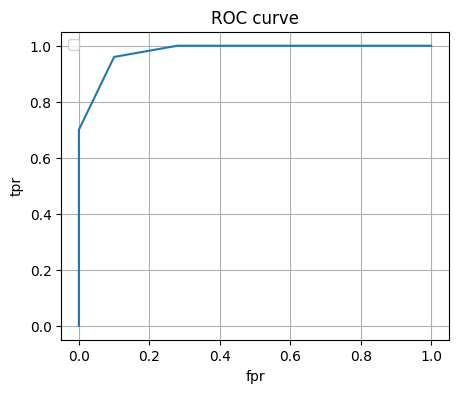

In [106]:
plt.figure(figsize=(5,4))
plt.plot(fpr,tpr)
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title('ROC curve')
plt.legend(loc="best")
plt.grid()
plt.show()

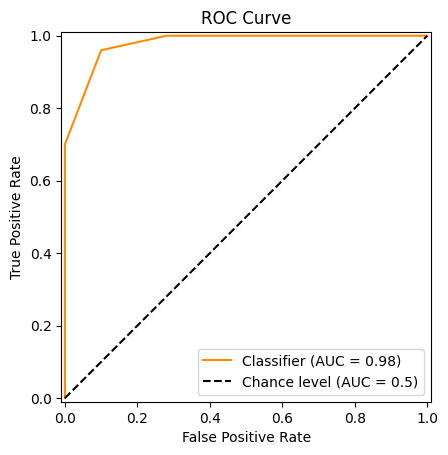

In [107]:
display = RocCurveDisplay.from_predictions(
    y,
    y_score[:, 1],
    color="darkorange",
    plot_chance_level=True,
)
display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="ROC Curve",
)
plt.show()

In [ ]:
roc_auc_score(y,y_pred)